In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)
#Defining features and outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

#Replace missing values with a 0.  I have no idea why they used a '?'
X= X.replace(to_replace = '?', value = 0)

#Binarize Y so that 1 means heart disease, 0 means clean
y = np.where(y>0, 0, 1)

#Ask about what the above line means and does. 


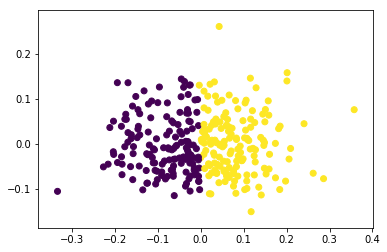

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
#Normalize the data
X_norm = normalize(X)

#Reduce it to 2 components
X_pca = PCA(2).fit_transform(X_norm)

#Calculate predicted values with 2 clusters.
y_pred = KMeans(n_clusters = 2, random_state = 42).fit_predict(X_pca)

#Plot the solution. 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_pred)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [5]:
#Really bad model above

minibatchkmeans = MiniBatchKMeans(init = 'random',
                                  n_clusters = 2,
                                 batch_size = 200)

minibatchkmeans.fit(X_pca)

#Add new predicted cluster memberships to tehh data frame
predict_mini = minibatchkmeans.predict(X_pca)

#Check minibatch against the earlier model

print('Comparing k means and mini batch k-means solutions')
print(pd.crosstab(predict_mini, y_pred))

Comparing k means and mini batch k-means solutions
col_0    0    1
row_0          
0      132    1
1       17  153


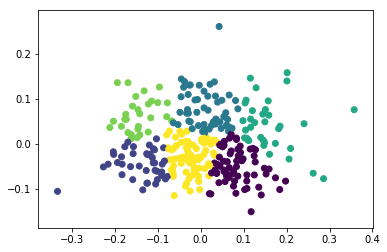

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44


In [7]:
y_pred2 = KMeans(n_clusters = 6, random_state = 42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_pred2)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y))
#Looking at the results I have no idea if that means its better
